In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['boston-crime-data', 'crimes-in-chicago', 'los-angeles-crime', 'historical-hourly-weather-data', 'crime-in-baltimore', 'chicago-beach-swim,-weather,-lab-data']


**This section is where I read in all the data into their respective dataframes.** 


In [2]:
crime_chi = pd.read_csv("../input/crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv", usecols=["Date", "Primary Type"], error_bad_lines=False)


In [3]:
weather = pd.read_csv("../input/chicago-beach-swim,-weather,-lab-data/beach-weather-stations-automated-sensors.csv", usecols=["Measurement Timestamp", "Air Temperature", "Total Rain"], error_bad_lines=False)

In [4]:

weather.columns = ['Date', 'Temp', 'Total Precipitation']
weather.loc[:,'Date'] = pd.to_datetime(weather.loc[:,'Date'])
weather['Date'] = weather['Date'].dt.date


In [5]:
#This cell takes a long time to run
crime_chi.loc[:,'Date'] = pd.to_datetime(crime_chi.loc[:,'Date'], dayfirst=True, yearfirst=False)
crime_chi['Date'] = crime_chi['Date'].dt.date

In [6]:
crime_chi = crime_chi.sort_values(by=['Date'])
weather = weather.dropna()

In [7]:
start_date = dt.date(2015,5,22)
# print(start_date)
end_date = dt.date(2017,1,18)
# print(end_date)
date_mask = (weather['Date'] > start_date) & (weather['Date'] <= end_date)
date_mask2 = (crime_chi['Date'] > start_date) & (crime_chi['Date'] <= end_date)

In [8]:
weather = weather.loc[date_mask]
crime_chi = crime_chi.loc[date_mask2]

In [9]:
#Get the list of the crimes considered "violent" by US law
violent = ['ASSAULT','BATTERY','CRIM SEXUAL ASSAULT', 'ROBBERY',
           'SEX OFFENSE', 'HOMICIDE', 'INTIMIDATION', 'KIDNAPPING', 'SEX']


In [10]:
#calculate the total frequency of all crimes per day. 
total_crimes = (crime_chi.groupby(['Date']).size())
avg_weather = weather.groupby(['Date']).mean()
# print(avg_weather)
# print(total_crimes)

**Creating a new dataframe containing [Date, Total Daily Crimes, Average Temperature for the Day[C]]**

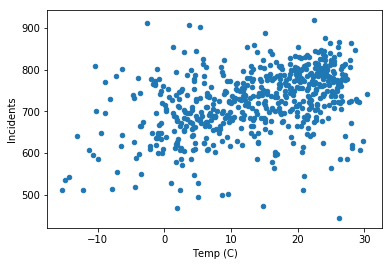

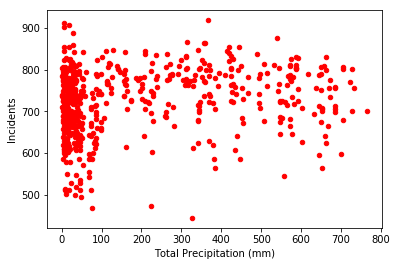

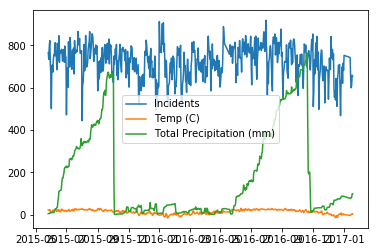

In [11]:
# date = pd.date_range(start=start_date, end=end_date)
# new_df = pd.DataFrame({'Date':date, 'Incidents':total_crimes}, )
# new_df

#create a merged data frame?
frames = [total_crimes, avg_weather]
result = pd.concat(frames, axis=1, sort=True)
result = result.dropna()
result.columns = ['Incidents','Temp (C)', 'Total Precipitation (mm)']
result.plot(kind='Scatter', x='Temp (C)', y='Incidents')
result.plot(kind='Scatter', x='Total Precipitation (mm)', y='Incidents', color='r')
result.plot()


[[3.32000575]]
[678.9409263]


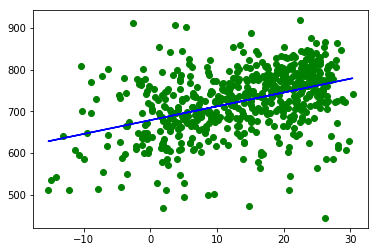

[[0.06824835]]
[711.54114668]


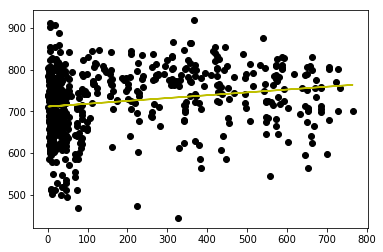

In [12]:

result.isnull().values.any()
regr = LinearRegression()
# std_dev = 4
#getting rid of data that is outside 4 standard deviations.
# result = result[(np.abs(stats.zscore(result)) < float(std_dev)).all(axis=1)]
X = pd.DataFrame(result['Temp (C)'])
y = pd.DataFrame(result['Incidents'])
# print(y)
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)
pred = regr.predict(X)
plt.scatter(result['Temp (C)'], result['Incidents'], color='g')
plt.plot(X, pred, color='b')
plt.show()

X2 = pd.DataFrame(result['Total Precipitation (mm)'])
regr2 = LinearRegression()
regr2.fit(X2, y)
p2 = regr2.predict(X2)
print(regr2.coef_)
print(regr2.intercept_)
plt.scatter(result['Total Precipitation (mm)'], result['Incidents'], color='k')
plt.plot(X2, p2, color='y')
plt.show()


In [13]:
v = (X.values.reshape([1,584]))
v.shape
w = y.values.reshape([1,584])
q = w.shape
print(type(q))
print(np.corrcoef(v,w))

<class 'tuple'>
[[1.        0.4184777]
 [0.4184777 1.       ]]


**Create some new masks to distinguish between summer and winter months**

In [14]:
start_summer15 = dt.date(2015, 6, 21)
end_summer15 = dt.date(2015, 9, 23)
start_summer16 = dt.date(2016, 6, 20)
end_summer16 = dt.date(2016, 9, 22)

summer15 = (weather['Date'] > start_summer15) & (weather['Date'] <= end_summer15)
csummer15 = (crime_chi['Date'] > start_summer15) & (crime_chi['Date'] <= end_summer15)
summer16 = (weather['Date'] > start_summer16) & (weather['Date'] <= end_summer16)
csummer16 = (crime_chi['Date'] > start_summer16) & (crime_chi['Date'] <= end_summer16)

summer_incidents = crime_chi[csummer15 | csummer16]
summer_weather = weather[summer15 | summer16]
 
avg_summerC = (summer_incidents.groupby(['Date']).size())
avg_summerT = summer_weather.groupby(['Date']).mean()



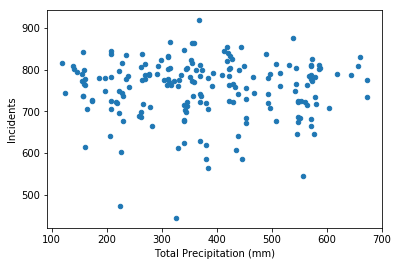

In [15]:
#combine the new data groups

f2 = [avg_summerC, avg_summerT]
summer_data = pd.concat(f2, axis=1, sort=True)
summer_data = summer_data.dropna()
summer_data.columns = ['Incidents','Temp (C)', 'Total Precipitation (mm)']
summer_data.plot(kind='Scatter', x='Total Precipitation (mm)', y='Incidents')
# summer_data

**If the relationship between temperature and weather was strongly correlated, we could qualitatively observe that more extreme weather resulted in more incidents.**

In [16]:
crime_chi_X = pd.DataFrame()

# Importing All Files

In [17]:
def clean_date(dataframe):
    dataframe.loc[:,'Date'] = pd.to_datetime(dataframe.loc[:,'Date'], dayfirst=True, yearfirst=False)
    dataframe['Date'] = dataframe['Date'].dt.date
    dataframe = dataframe.sort_values(by=['Date'])
    dataframe = dataframe.dropna()
    return dataframe

In [18]:
crime_la = pd.read_csv('../input/los-angeles-crime/Crimes_2012-2016.csv', 
                       engine='python', usecols = ['DATE.OCC', 'CrmCd.Desc'], error_bad_lines=False)


In [19]:
crime_la.columns = ['Date', 'Description']
crime_la = clean_date(crime_la)
crime_la.head(3)

,Date,Description
237133,2012-01-01,BURGLARY FROM VEHICLE
237314,2012-01-01,"LETTERS, LEWD"
237315,2012-01-01,THEFT OF IDENTITY


In [20]:
crime_baltimore = pd.read_csv('../input/crime-in-baltimore/BPD_Part_1_Victim_Based_Crime_Data.csv', usecols = ["CrimeDate", "Description"], 
                              engine='python',error_bad_lines=False)


In [21]:
crime_baltimore.columns = ['Date', 'Description']
crime_baltimore = clean_date(crime_baltimore)
crime_baltimore.head(3)

,Date,Description
276528,2012-01-01,BURGLARY
276415,2012-01-01,ROBBERY - RESIDENCE
276414,2012-01-01,LARCENY


In [22]:
crime_boston = pd.read_csv('../input/boston-crime-data/crime.csv', engine='python',
                           usecols=["OFFENSE_DESCRIPTION", "OCCURRED_ON_DATE"], error_bad_lines=False)


In [23]:
crime_boston.columns = ['Description', 'Date']
crime_boston = clean_date(crime_boston)
crime_boston.head(3)

,Description,Date
327302,BURGLARY - RESIDENTIAL - NO FORCE,2015-06-15
327365,CRIMINAL HARASSMENT,2015-06-15
327366,DRUGS - OTHER,2015-06-15


In [24]:
crime_chi.columns = ['Date', 'Description']
crime_chi = clean_date(crime_chi)
crime_chi.head(3)
#takes a long time to run


,Date,Description
1033602,2015-05-23,CRIMINAL DAMAGE
1037889,2015-05-23,THEFT
1032387,2015-05-23,BATTERY


In [25]:
temperatures_all = pd.read_csv('../input/historical-hourly-weather-data/temperature.csv', engine='python',
                               usecols=["datetime","Los Angeles","Chicago","Boston"], 
                               error_bad_lines=False)


In [26]:
temperatures_all.columns = ['Date', 'LA', 'CHI', 'BO']
temperatures_all = clean_date(temperatures_all)
temperatures_all.head(3)

,Date,LA,CHI,BO
10,2012-10-01,291.825457,285.036461,287.550728
9,2012-10-01,291.830798,284.913739,287.505149
8,2012-10-01,291.836139,284.791018,287.459569


In [27]:
def k_to_c(column):
    result = [(x - 273.15) for x in column]
    return result


In [28]:
#convert kelvin to celcius
#only rune this cell ONCE, otherwise the data will be off by, n*-273.15
for column in temperatures_all:
    if column == 'Date':
        pass
    else:
        temperatures_all[column] = k_to_c(temperatures_all[column])


In [61]:
def quant_corr(df):
    '''df is a two column dataframe.
    This function returns the slope, intercept, and r-values for 
    a scatter plot to quantify the strength of a relationship.w'''
    
#     std_dev = 3
#     print("excluding values outside a SD =", std_dev)
#     getting rid of data that is outside 4 standard deviations.
#     df = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]
    regr = LinearRegression()
    X = pd.DataFrame(df.iloc[:,1]) #incidents
    y = pd.DataFrame(df.iloc[:,0]) #temperatures
    regr.fit(X,y)
    print(regr.coef_) #slope of correlation
    print(regr.intercept_) #y intercept
    pred = regr.predict(X) #this can be plotted against X to get a line. 
    rval, pval = stats.pearsonr(X, y)
    print("Correlation coefficient is:", rval, "P value is: ", pval)
    return pred

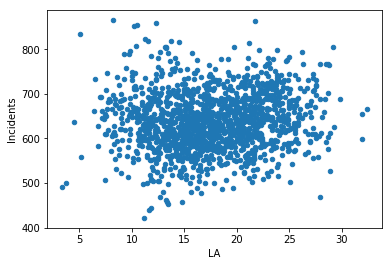

In [54]:
def intersection(lst1,lst2, *args):
#     for ar in args:
#         print(ar)
    lst3 = [value for value in lst1 if (value in lst2)]# and (value in args[0])]
    return lst3


def temp_correlation(temps, incidents, *args):
    '''This function produces a scatter plot after inputting two dataframes that
    do not have consistent date ranges. '''
    #check intersection of dates
    t_dates = list(temps.Date.unique()) 
    crime_dates = list(incidents.Date.unique())
    date_range = intersection(t_dates, crime_dates)
    
    #get start date and end date masks
    start_date = date_range[0]
    end_date = date_range[len(date_range) - 1]
    date_mask = (temps['Date'] > start_date) & (temps['Date'] <= end_date)
    date_mask2 = (incidents['Date'] > start_date) & (incidents['Date'] <= end_date)
    
    #match the timeframes
    temps = temps.loc[date_mask]
    incidents = incidents.loc[date_mask2]
    
    #get number of incidents of crime
    total_crimes = (incidents.groupby(['Date']).size())
    avg_weather = temps.groupby(['Date']).mean()
    
    #combine dataframes
    frames = [total_crimes, avg_weather]
    result = pd.concat(frames, axis=1, sort=True)
    result = result.dropna()
    std_dev = 3
    result = result[(np.abs(stats.zscore(result)) < float(std_dev)).all(axis=1)]
    #get correlation
    if len(result.columns) == 4:
        result.columns = ['Incidents','LA', 'CHI', 'BO']
    elif len(result.columns) == 2:
        result.columns = ['Incidents', args[0]]
    result.plot(kind='Scatter', x=args[0], y='Incidents')
#     plt.title("")
    combined = result[['Incidents', args[0]]]
#     print(combined)

    return combined #This is the combined dataframe with overall average 

la_result = temp_correlation(temperatures_all, crime_la, 'LA')

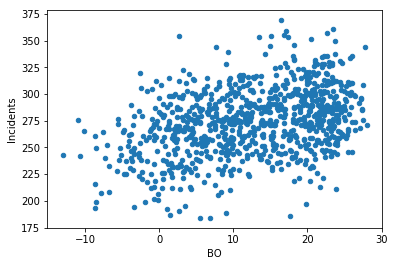

In [31]:
bo_result = temp_correlation(temperatures_all, crime_boston, 'BO')
# print(bo_result)

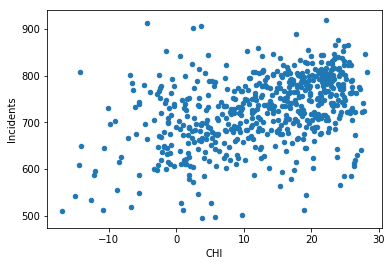

In [32]:
chi_result = temp_correlation(temperatures_all, crime_chi, 'CHI')

In [64]:
qchi = quant_corr(chi_result)

[[3.22614033]]
[685.55512104]
Correlation coefficient is: [0.41682326] P value is:  [3.35543259e-26]


In [92]:
qla = quant_corr(la_result)

[[1.33532771]]
[614.37947743]
Correlation coefficient is: [0.10068545] P value is:  [0.00010905]


In [91]:
qbo = quant_corr(bo_result)

[[1.32559171]]
[257.24215594]
Correlation coefficient is: [0.37795443] P value is:  [1.55614497e-31]


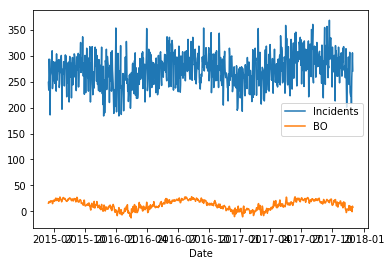

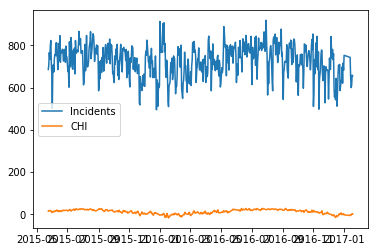

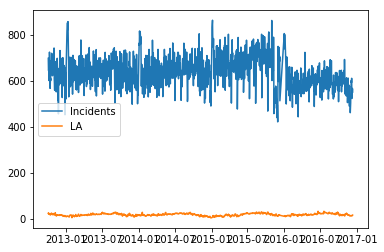

In [67]:
bo_result.plot()
chi_result.plot()
la_result.plot()

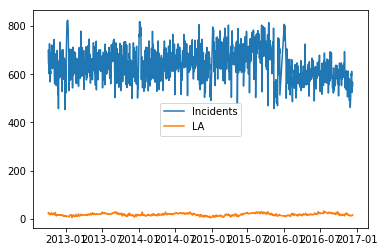

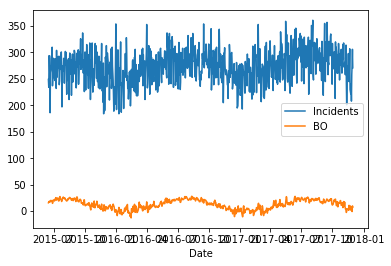

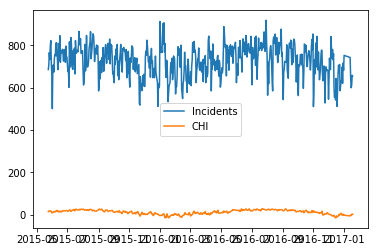

In [68]:
std_dev = 3
la_clean = la_result[(np.abs(stats.zscore(la_result)) < float(std_dev)).all(axis=1)]
bo_clean = bo_result[(np.abs(stats.zscore((bo_result))) < float(std_dev)).all(axis=1)]
chi_clean = chi_result[(np.abs(stats.zscore(chi_result)) < float(std_dev)).all(axis=1)]
# plt.fig(figsize=([11,8.5]))
la_clean.plot()
bo_clean.plot()
chi_clean.plot()

In [69]:
# types_baltimore = (list(crime_baltimore['Description'].unique()))
alltypes_chi = (list(crime_chi['Description'].unique()))
alltypes_bo = (list(crime_boston['Description'].unique()))
alltypes_la = (list(crime_la['Description'].unique()))


def get_types(all_types, type_list):
    violent_type = []
    for x in all_types:
        for y in type_list:
#             print(type(x))
            if y in x:
                violent_type.append(x)
    return violent_type
types = get_types(alltypes_la, violent)
incidents = crime_la.loc[crime_la['Description'].isin(types)]

In [70]:
def type_correlation(city, temps, types, *args):
    '''Func temperature correlation gives temp vs overall crime, this gives
    a correlation for violent/nonviolent crime.'''
    #first, get the dataframe for the types of crime
    incidents = city.loc[city['Description'].isin(types)]
    weather = temps
    
    #check intersection of dates
    t_dates = list(temps.Date.unique()) 
    crime_dates = list(incidents.Date.unique())
    date_range = intersection(t_dates, crime_dates)
    
    #get start date and end date masks
    start_date = date_range[0]
    end_date = date_range[len(date_range) - 1]
    date_mask = (temps['Date'] > start_date) & (temps['Date'] <= end_date)
    date_mask2 = (incidents['Date'] > start_date) & (incidents['Date'] <= end_date)
    
    #match the timeframes
    temps = temps.loc[date_mask]
    incidents = incidents.loc[date_mask2]
    
    #get number of incidents of crime
    total_crimes = (incidents.groupby(['Date']).size())
    avg_weather = temps.groupby(['Date']).mean()
    
    #combine dataframes
    frames = [total_crimes, avg_weather]
    result = pd.concat(frames, axis=1, sort=True)
    result = result.dropna()
    #get correlation
    if len(result.columns) == 4:
        result.columns = ['Incidents','LA', 'CHI', 'BO']
    elif len(result.columns) ==2:
        result.columns = ['Incidents', 'Total Precipitation']
    result.plot(kind='Scatter', x=args[0], y='Incidents')
    combined = result[['Incidents', args[0]]]
#     print(combined)
#     combined = temp_correlation(incidents, weather, args[0])
    return combined


[[1.26894998]]
[209.50619539]
Correlation coefficient is: [0.33252002] P value is:  [7.93287358e-17]


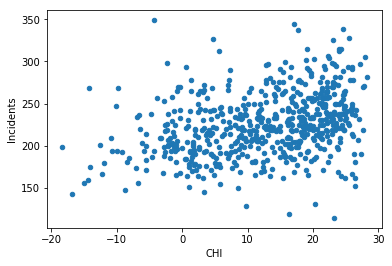

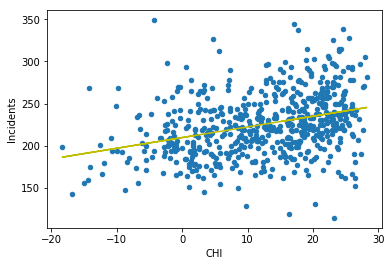

In [71]:
violent_chi = type_correlation(crime_chi, temperatures_all, violent, 'CHI')
violent_chi.plot(kind='scatter', x='CHI', y='Incidents')
vchi = quant_corr(violent_chi)
plt.plot(violent_chi['CHI'], vchi, color='y')

[[1.12863377]]
[124.27669386]
Correlation coefficient is: [0.21345676] P value is:  [7.25620104e-17]


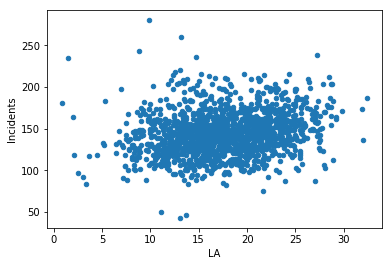

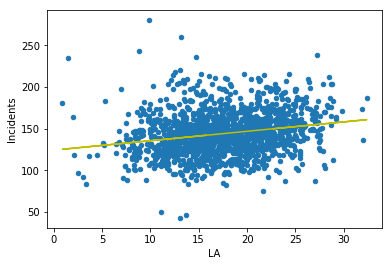

In [72]:
v_la = get_types(alltypes_la, violent)
violent_la = type_correlation(crime_la, temperatures_all, v_la, 'LA')
violent_la.plot(kind='scatter', x='LA', y='Incidents')
vla = quant_corr(violent_la)
plt.plot(violent_la['LA'], vla, color='y')

[[0.16965962]]
[22.06575566]
Correlation coefficient is: [0.25301271] P value is:  [1.3473783e-14]


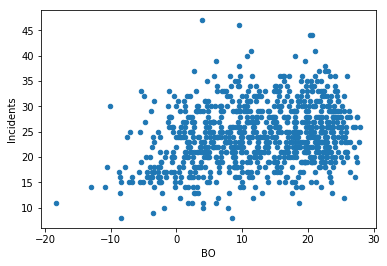

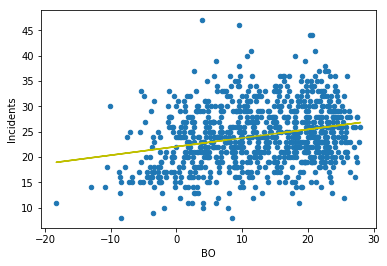

In [73]:
v_bo = get_types(alltypes_bo, violent)
violent_bo = type_correlation(crime_boston, temperatures_all, v_bo, 'BO')
violent_bo.plot(kind='scatter', x='BO', y='Incidents')
vbo = quant_corr(violent_bo) #These are all very weakly correlated. 
plt.plot(violent_bo['BO'], vbo, color='y')

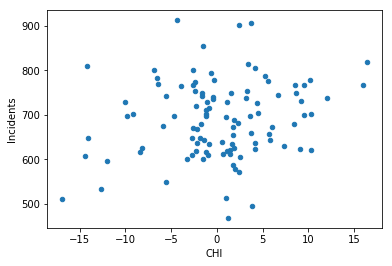

In [74]:
def winter_correlation(incidents, temps, *args):
    #create dateranges
    winter_start1718 = dt.datetime(2017, 12, 21).date()
    winter_end1718 = dt.datetime(2018,3,20).date()
    winter_start1617 = dt.datetime(2016,12,21).date()
    winter_end1617 = dt.datetime(2017,3,20).date()
    winter_start1516 = dt.datetime(2015,12,21).date()
    winter_end1516=dt.datetime(2016,3,19).date()
    #create masks
    win_temp1718 = (temps['Date'] > winter_start1718) & (temps['Date'] <= winter_end1718)
    win_crim1718 = (incidents['Date'] > winter_start1718) & (incidents['Date'] <= winter_end1718)
    win_temp1617 = (temps['Date'] > winter_start1617) & (temps['Date'] <= winter_end1617)
    win_crim1617 = (incidents['Date'] > winter_start1617) & (incidents['Date'] <= winter_end1617)
    win_temp1516 = (temps['Date'] > winter_start1516) & (temps['Date'] <= winter_end1516)
    win_crim1516 = (incidents['Date'] > winter_start1516) & (incidents['Date'] <= winter_end1516)
    winter = win_temp1516 | win_temp1617 | win_temp1718
    winter_crime = win_crim1516 | win_crim1617 | win_crim1718
    #change dataframes
    incidents = incidents[winter_crime]
    temps = temps[winter]
    
    combined = temp_correlation(temps, incidents, args[0])
    return combined

chi_winter = winter_correlation(crime_chi, temperatures_all, 'CHI')

[[4.69391772]]
[702.56464838]
Correlation coefficient is: [0.4907587] P value is:  [0.03288453]


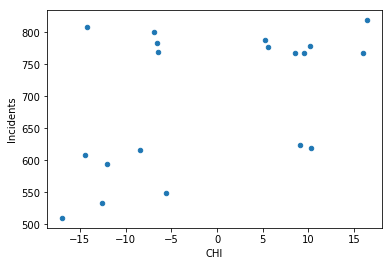

In [83]:
def extreme_corr(df, *args):
    avg_temp = np.mean(df[args[0]])
    std_dev = 0.75
    ex_df = df[(np.abs(stats.zscore(df)) > float(std_dev)).all(axis=1)]
#     ex_df = ex_df[ex_df[args[0]] < 0]
#     print(ex_df)
    ex_df.plot(kind='Scatter', x=args[0], y='Incidents')
    return ex_df


chi_cold = extreme_corr(chi_winter, 'CHI')
vchi = quant_corr(chi_cold)
    


In [86]:
# def c_to_k(column):
#     result = [(x + 273.15) for x in column]
#     return result

# result['Temp (C)'] = c_to_k(result['Temp (C)'])
# result.plot()

In [87]:
def summer_correlation(incidents, temps, *args):
    '''Func returns scatterplot of summer weather vs overall crime.'''
    #create dateranges
    summer_start15 = dt.date(2015, 6, 21)
    summer_end15 = dt.date(2015, 9, 23)
    summer_start16 = dt.date(2016, 6, 20)
    summer_end16 = dt.date(2016, 9, 22)
    summer_start17 = dt.date(2017, 6, 21)
    summer_end17 = dt.date(2017, 9, 22)
    #create masks
    sum_temp17 = (temps['Date'] > summer_start17) & (temps['Date'] <= summer_end17)
    sum_crim17 = (incidents['Date'] > summer_start17) & (incidents['Date'] <= summer_end17)
    sum_temp16 = (temps['Date'] > summer_start16) & (temps['Date'] <= summer_end16)
    sum_crim16 = (incidents['Date'] > summer_start16) & (incidents['Date'] <= summer_end16)
    sum_temp15 = (temps['Date'] > summer_start15) & (temps['Date'] <= summer_end15)
    sum_crim15 = (incidents['Date'] > summer_start15) & (incidents['Date'] <= summer_end15)
    summer = sum_temp15 | sum_temp16 | sum_temp17
    summer_crime = sum_crim15 | sum_crim16 | sum_crim17
    #change dataframes
    incidents = incidents[summer_crime]
    weather = temps[summer]
    
    #The rest is the same as temps correlation
    combined = temp_correlation(weather, incidents, args[0])
    
    return combined

[[1.28621642]]
[253.49241742]
Correlation coefficient is: [0.21752276] P value is:  [0.00383237]
[[2.67072872]]
[235.95489732]
Correlation coefficient is: [0.42838031] P value is:  [0.02294613]
[[0.69248743]]
[268.09500289]
Correlation coefficient is: [0.07018835] P value is:  [0.24515499]
[[0.97123556]]
[260.95560361]
Correlation coefficient is: [0.09491098] P value is:  [0.49065348]
The average number of incidents in the summer months in Boston is: 283.03985507246375
The average number of incidents in the winter months in Boston is: 255.58285714285714


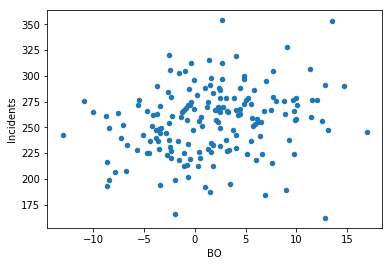

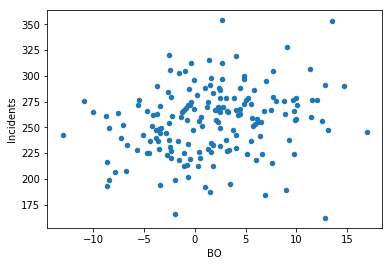

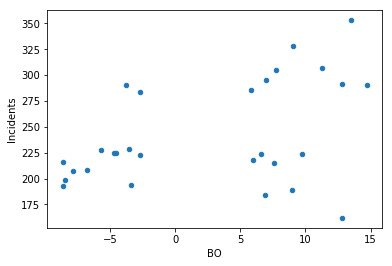

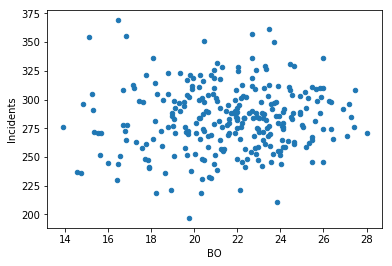

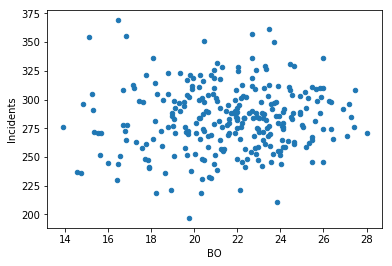

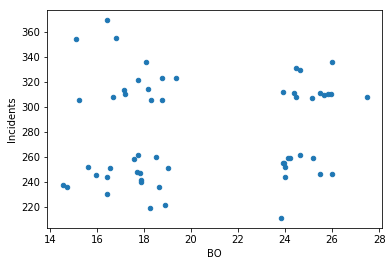

In [88]:
BO_winter = winter_correlation(crime_boston, temperatures_all, 'BO')
BO_winter.plot(kind='scatter', x='BO', y='Incidents')
BO_cold = extreme_corr(BO_winter, 'BO')
# chi_cold.plot(kind='')
pBO_winter = quant_corr(BO_winter)
pBO_cold = quant_corr(BO_cold)

BO_summer = summer_correlation(crime_boston, temperatures_all, 'BO')
BO_summer.plot(kind='scatter', x='BO', y='Incidents')
BO_hot = extreme_corr(BO_summer, 'BO')

pBO_summer = quant_corr(BO_summer)
pBO_hot = quant_corr(BO_hot)

print("The average number of incidents in the summer months in Boston is:", np.mean(BO_summer['Incidents']))
print("The average number of incidents in the winter months in Boston is:", np.mean(BO_winter['Incidents']))

[[-5.74129854]]
[686.82510002]
Correlation coefficient is: [-0.28597468] P value is:  [0.01226978]
[[-9.5239241]]
[742.07339842]
Correlation coefficient is: [-0.40070086] P value is:  [0.12402982]
[[-0.58761254]]
[296.92624954]
Correlation coefficient is: [-0.04901638] P value is:  [0.4173007]
[[-0.81398761]]
[301.55531611]
Correlation coefficient is: [-0.06617148] P value is:  [0.61543472]


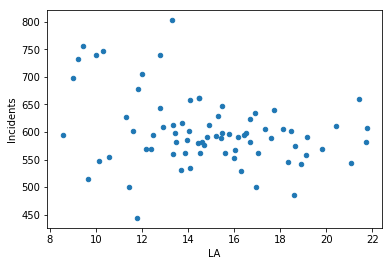

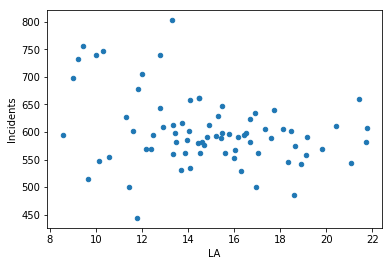

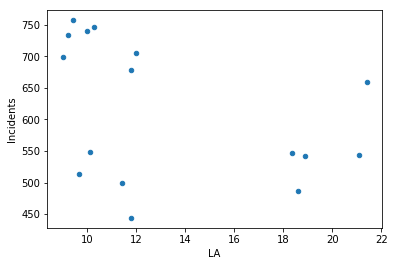

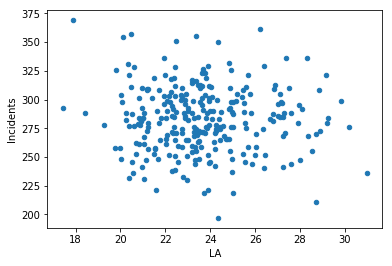

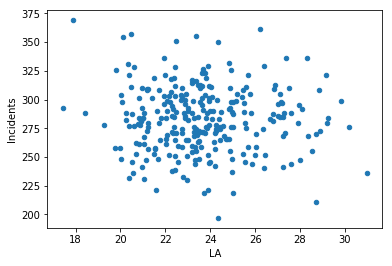

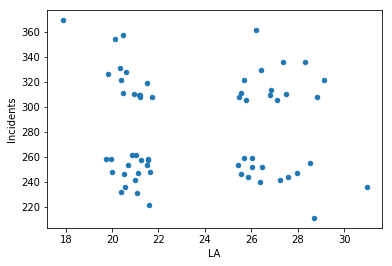

In [89]:
LA_winter = winter_correlation(crime_la, temperatures_all, 'LA')
LA_winter.plot(kind='scatter', x='LA', y='Incidents')
LA_cold = extreme_corr(LA_winter, 'LA')
# chi_cold.plot(kind='')
pLA_winter = quant_corr(LA_winter)
pLA_cold = quant_corr(LA_cold)

LA_summer = summer_correlation(crime_boston, temperatures_all, 'LA')
LA_summer.plot(kind='scatter', x='LA', y='Incidents')
LA_hot = extreme_corr(LA_summer, 'LA')

pLA_summer = quant_corr(LA_summer)
pLA_hot = quant_corr(LA_hot)

# print("The average number of incidents in the summer months in Los Angeles is:", np.mean(LA_summer['Incidents']))
# print("The average number of incidents in the winter months in Los Angeles is:", np.mean(LA_winter['Incidents'])

3
[[0.06947108]]
[712.58917799]
Correlation coefficient is: [0.19806876] P value is:  [1.52794104e-06]
[[-0.01544776]]
[762.50927423]
Correlation coefficient is: [-0.03298046] P value is:  [0.65584027]
[[-0.00826954]]
[749.60867179]
Correlation coefficient is: [-0.01718293] P value is:  [0.91730932]
[[-0.82492156]]
[716.51331357]
Correlation coefficient is: [-0.24891514] P value is:  [0.01045142]
[[-1.77749595]]
[717.25068023]
Correlation coefficient is: [-0.40345606] P value is:  [0.03325447]


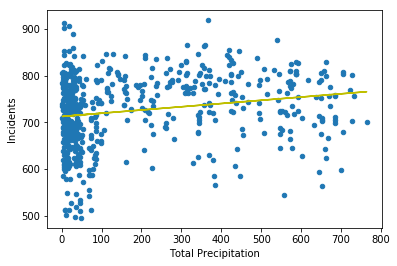

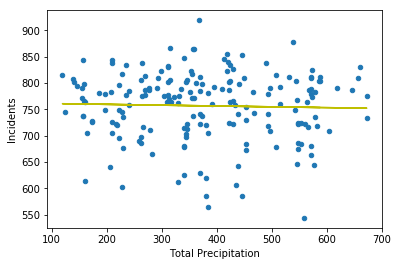

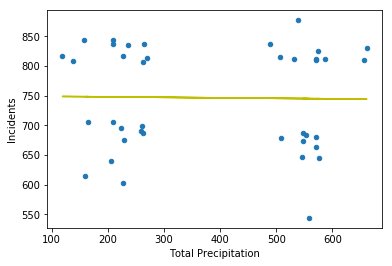

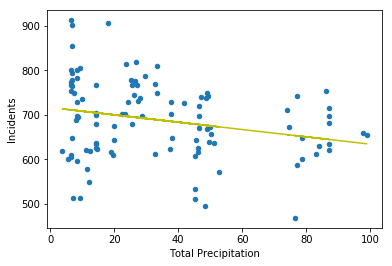

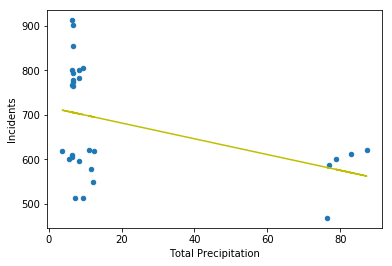

In [90]:
# result.plot()
print(len(result.columns))
# crime_chi
precip = weather[['Date', 'Total Precipitation']]
# precip

rain_corr_all = temp_correlation(precip, crime_chi, 'Total Precipitation')
chicago_rain = quant_corr(rain_corr_all)
plt.plot(rain_corr_all['Total Precipitation'], chicago_rain, color='y', label='all')

rain_corr_sum = summer_correlation(crime_chi, precip, 'Total Precipitation')
chicago_summer_rain = quant_corr(rain_corr_sum)
plt.plot(rain_corr_sum['Total Precipitation'], chicago_summer_rain, color='y', label='Summer')

sum_ex_rain = extreme_corr(rain_corr_sum, 'Total Precipitation')
psumxrain = quant_corr(sum_ex_rain)
plt.plot(sum_ex_rain['Total Precipitation'], psumxrain, color='y')

rain_corr_win = winter_correlation(crime_chi, precip, 'Total Precipitation')
chicago_winter_rain = quant_corr(rain_corr_win)
plt.plot(rain_corr_win['Total Precipitation'], chicago_winter_rain, color='y')

win_x_rain = extreme_corr(rain_corr_win, 'Total Precipitation')
pwinxrain = quant_corr(win_x_rain)
plt.plot(win_x_rain['Total Precipitation'], pwinxrain, color='y')

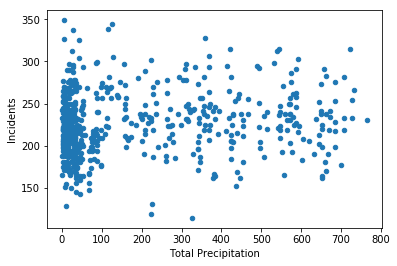

In [81]:
violent_chi_rain = type_correlation(crime_chi, precip, violent, 'Total Precipitation')
